In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import xmltodict
from tqdm import tqdm

(366, 512, 3)

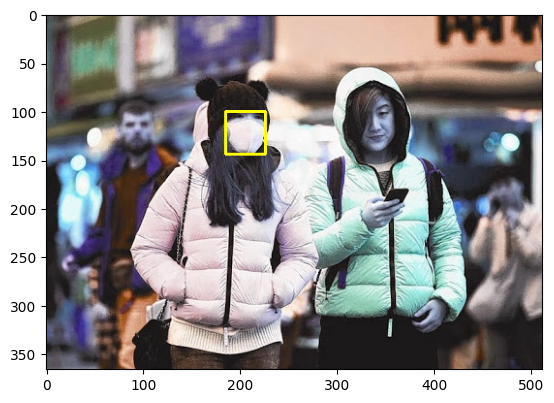

In [5]:
# Reading annotations 

with open("annotations/maksssksksss0.xml", "r", encoding="utf-8") as file:
    xml = file.read()
dic = xmltodict.parse(xml)

img = cv2.imread("images/maksssksksss0.png")
cv2.rectangle(img, (185,100), (226,144), (255,255,0), 2)
plt.imshow(img)
img.shape

In [6]:
dic["annotation"]["object"]

[{'name': 'without_mask',
  'pose': 'Unspecified',
  'truncated': '0',
  'occluded': '0',
  'difficult': '0',
  'bndbox': {'xmin': '79', 'ymin': '105', 'xmax': '109', 'ymax': '142'}},
 {'name': 'with_mask',
  'pose': 'Unspecified',
  'truncated': '0',
  'occluded': '0',
  'difficult': '0',
  'bndbox': {'xmin': '185', 'ymin': '100', 'xmax': '226', 'ymax': '144'}},
 {'name': 'without_mask',
  'pose': 'Unspecified',
  'truncated': '0',
  'occluded': '0',
  'difficult': '0',
  'bndbox': {'xmin': '325', 'ymin': '90', 'xmax': '360', 'ymax': '141'}}]

In [70]:
for i in tqdm(os.listdir("annotations")):
    annotation_path = os.path.join("annotations",i)
    with open(annotation_path, "r", encoding="utf-8") as file:
        xml = file.read() 
    dic = xmltodict.parse(xml)
    for j in dic["annotation"]["object"]:
        #class = 0 without mask and class = 1 with mask
        try:
            if(j["name"] == "without_mask"):
                clss = 0
                xmin = int(j["bndbox"]["xmin"])
                ymin = int(j["bndbox"]["ymin"])
                xmax = int(j["bndbox"]["xmax"])
                ymax = int(j["bndbox"]["ymax"])
            elif(j["name"] == "with_mask"):
                clss = 1
                xmin = int(j["bndbox"]["xmin"])
                ymin = int(j["bndbox"]["ymin"])
                xmax = int(j["bndbox"]["xmax"])
                ymax = int(j["bndbox"]["ymax"])
            h_img,w_img,channel = img.shape 
            w=xmax-xmin
            h=ymax-ymin
            xcenter=(xmin+w/2)/(w_img)
            ycenter=(ymin+h/2)/(h_img)
            w=w/w_img
            h=h/h_img
            k = i.split(".")[0] + ".txt"
            yolo_file = os.path.join("data/labels", k)
            with open(yolo_file, "a") as x:
                line = str(clss)+"\t"+str(xcenter)+"\t"+str(ycenter)+"\t"+str(w)+"\t"+str(h)+"\n"
                x.write(line)
            img_name = i.split(".")[0] + ".png"
            img_path = os.path.join("images", img_name)
            img = cv2.imread(img_path)
            cv2.imwrite("data/images/"+img_name, img)
        except:
                continue
        


 13%|██████████████████▍                                                                                                                                | 107/853 [00:09<02:27,  5.06it/s]


 27%|███████████████████████████████████████▎                                                                                                           | 228/853 [00:20<01:02,  9.93it/s]


 40%|██████████████████████████████████████████████████████████▉                                                                                        | 342/853 [00:28<00:49, 10.37it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited

 42%|██████████████████████████████████████████████████████████████                                                                                     | 360/853 [00:29<00:31, 15.80it/s]


 59%|███████████████████████████████████████████████████████████████████████████████████████▎                                                           | 507/853 [00:40<00:18, 18.98it/s]


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 648/853 [00:52<00:15, 13.25it/s]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 758/853 [01:01<00:09,  9.51it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 853/853 [01:08<00:00, 12.53it/s]


In [72]:
print("Number of images are ", len(os.listdir("data/images")))
print("Number of yolo annotations created are ", len(os.listdir("data/labels")))

Number of images are  524
Number of yolo annotations created are  524


The Yolo format for annotations is as follows 

class_id x center y_center width height

In [13]:
#For yolov7 the folder structure would be 
# data 
#  |
#  images | annotations
# Two .txt files containing the location of the training and validation images

In [3]:
%cd yolov7

c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\notebooks\yolov7


In [8]:
count = 0
for i in os.listdir("data/images"):
    img_path = os.path.join(os.getcwd()+"/data/images", i)
    if(count<450):
        with open("train.txt", "a") as x:
            x.write(img_path+"\n")
    else:
        with open("valid.txt", "a") as x:
            x.write(img_path+"\n")
    count = count + 1

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\data\\images'

In [80]:
%cd yolov7

/home/prishanga_bora/temp/yolov7


In [5]:
!python train.py --workers 8 --device 0 --batch-size 16 --data data.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights '' --name yolov7 --hyp data/hyp.scratch.p5.yaml --epochs 100

YOLOR  2024-2-16 torch 2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4095.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data.yaml', device='0', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\yolov717', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights="''", workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_b

In [6]:
!python detect.py --weights runs/train/yolov714/weights/best.pt --conf 0.25 --img-size 640 --source _preview.png

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='_preview.png', update=False, view_img=False, weights=['runs/train/yolov714/weights/best.pt'])


YOLOR  2024-2-16 torch 2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4095.8125MB)

Traceback (most recent call last):
  File "detect.py", line 196, in <module>
    detect()
  File "detect.py", line 34, in detect
    model = attempt_load(weights, map_location=device)  # load FP32 model
  File "c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\notebooks\yolov7\models\experimental.py", line 252, in attempt_load
    ckpt = torch.load(w, map_location=map_location)  # load
  File "c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\.venv\lib\site-packages\torch\serialization.py", line 998, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "c:\Users\Abel\Documents\10 Academy\week-10\Automated-Storyboard-Synthesis-for-Digital-Advertising\.venv\lib\site-packages\torch\serialization.py", line 445, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "c:\Users\Abel\Document

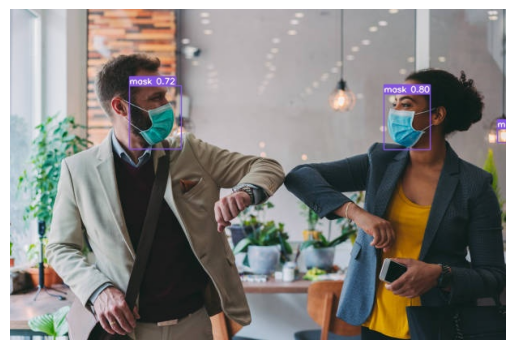

In [95]:
img = cv2.imread("runs/detect/exp3/mask.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)

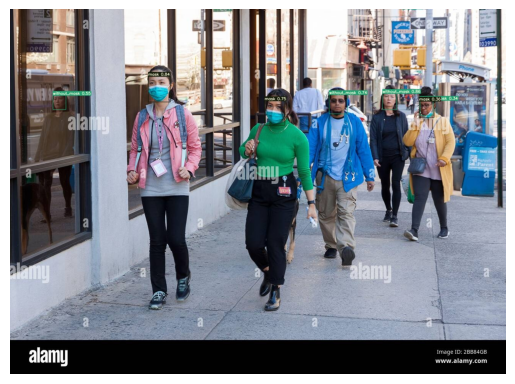

In [99]:
img = cv2.imread("runs/detect/exp5/mask.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)